#Polynomial Regression

In simple linear regression algorithm only works when the relationship between the data is linear But suppose if we have non-linear data then Linear regression will not capable to draw a best-fit line and It fails in such conditions. consider the below diagram which has a non-linear relationship and you can see the Linear regression results on it, which does not perform well means which do not comes close to reality. Hence, we introduce polynomial regression to overcome this problem, which helps identify the curvilinear relationship between independent and dependent variables.


##How Polynomial Regression Overcomes the problem of Non-Linear data?


Polynomial regression is a form of Linear regression where only due to the Non-linear relationship between dependent and independent variables we add some polynomial terms to linear regression to convert it into Polynomial regression.

Suppose we have X as Independent data and Y as dependent data. Before feeding data to a mode in preprocessing stage we convert the input variables into polynomial terms using some degree.

Consider an example my input value is 35 and the degree of a polynomial is 2 so I will find 35 power 0, 35 power 1, and 35 power 2 And this helps to interpret the non-linear relationship in data.
The equation of polynomial becomes something like this.


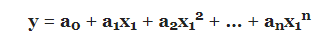


The degree of order which to use is a Hyperparameter, and we need to choose it wisely. But using a high degree of polynomial tries to overfit the data and for smaller values of degree, the model tries to underfit so we need to find the optimum value of a degree.






##Why Polynomial Regression is called Polynomial Linear Regression?


If you see the equation of polynomial regression carefully, then we can see that we are trying to estimate the relationship between coefficients and y. And the values of x and y are already given to us, only we need to determine coefficients and the degree of coefficient here is 1 only, and degree one represents simple linear regression Hence, Polynomial regression is also known as polynomial Linear regression.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

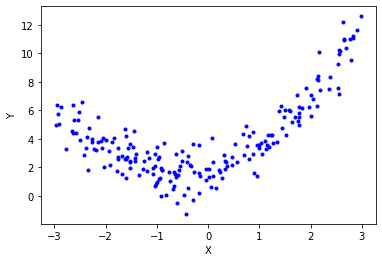

In [18]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200, 1)
#equation used -> y = 0.8x^2 + 0.9x + 2
#visualize the data
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [4]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

0.06709415976649202


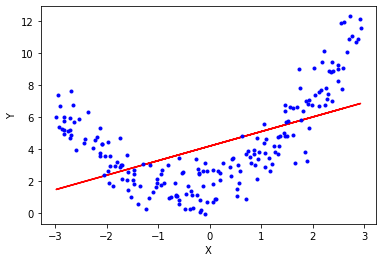

In [5]:
plt.plot(x_train, lr.predict(x_train), color="r")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [6]:
#Apply Polynomial Regression
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.8731170142004228


In [7]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.93036312 0.82895691]]
[1.8314554]


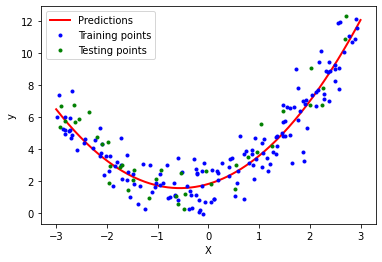

In [8]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

#Playing with Polynomial degree

Now we will design a function that will help you to find the right value of a degree. here we apply all the preprocessing steps we have done above in a function and map the end prediction plot on it. Only you need to pass is degree and it will build a model and plot a graph of a particular degree. here we will create a pipeline of preprocessing steps that makes the process streamlined.

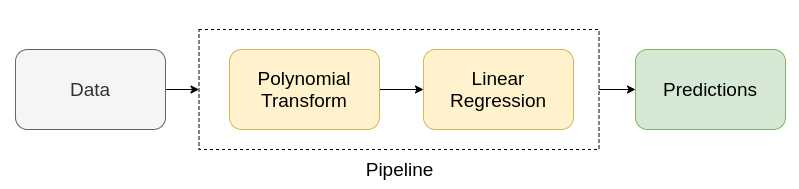

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

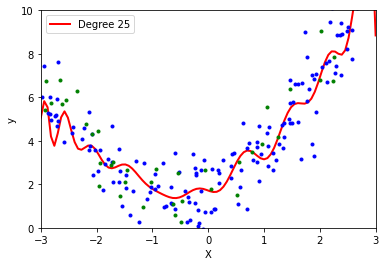

In [20]:
polynomial_regression(25)

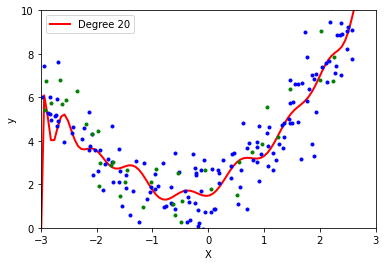

In [21]:
polynomial_regression(20)

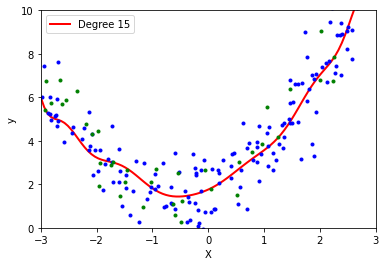

In [22]:
polynomial_regression(15)